## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [11]:
%reload_ext autoreload
%autoreload 2

123

День: 2024-10-24, 'тестовый', Итог: 603
{'exp': 'MVID fan ', 'profit': 603, 'profit_p': 0.6, 'profit_p_avg': 0.6, 'config': MVID+ 4/fan7:0/2 x l1 x 0.6(+x0.2)¤ , 'last_conf': MVID+ 4/fan7:0/2 x l121 x 0.6(+x0.2)¤ , 'op': 20}


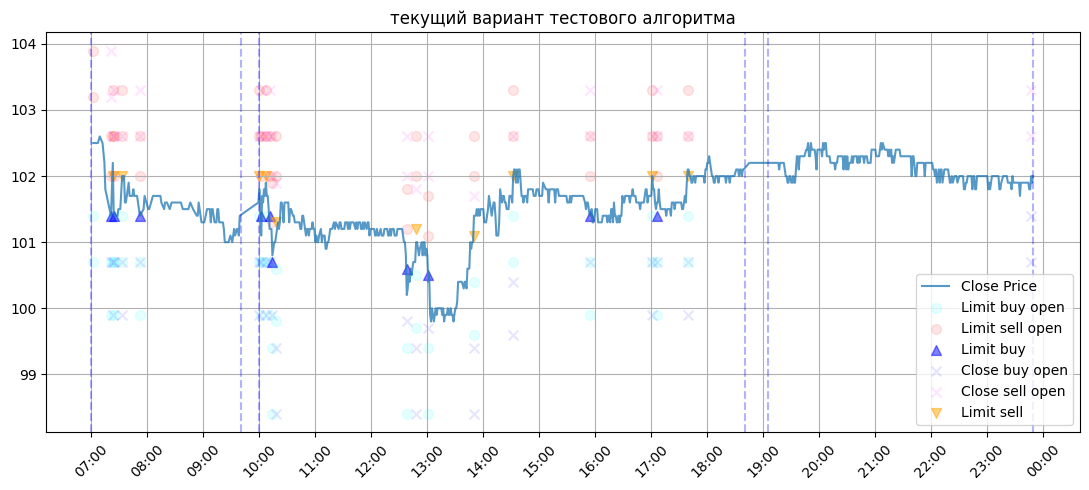

In [12]:
from app import create_app
from app.models import Order, Run
from app.cache import LocalCache
from app.config import RunConfig
from bot import TestAlgorithm
from datetime import datetime
from app.plot import PlotRun

LocalCache.clear()

config = RunConfig.from_repr_string('MVID+ 4/fan7:0/2 x l1 x 0.6(+x0.2)¤')
# config.start_time = '7:00'
# config.end_time = '8:00'
date = '2024-10-24'
# date = None
if date is None:
    date = datetime.now().strftime('%Y-%m-%d')

def show_test_alg():
    test_alg = TestAlgorithm(
        do_printing=False,
        config=config
    )

    result = test_alg.test(
        last_test_date = date,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
        shares_count=0,
    )
    
    print()
    print(f"День: {date}, 'тестовый', Итог: {result['profit']}"
          # f", Записей: {result['op_cnt']}"
          )
    print(result)

    PlotRun.draw_notebook(
        config.ticker,
        date,
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

# выводим результаты за этот день
# app = create_app()
# with app.app_context():
#     runs = Run.get_by_date_and_ticker(date, config.ticker)
#     for run in runs:
#         print(f"Run id {run.id}, "
#               f"Итог: {run.total}, "
#               f"Записей: {run.operations_cnt}")
#         PlotRun.draw_notebook(
#             config.ticker,
#             date,
#             Order.get_by_run_id(run.id),
#             f"{run}"
#         )

# выводим результаты тестового алгоритма
show_test_alg()
